### 전처리

In [56]:
import pandas as pd
import numpy as np
orders = pd.read_csv("/app/spark/Olist/raw_data/olist_order_items_dataset.csv")
orders.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [57]:
orders.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [58]:
orders.groupby('order_id').count().sort_values('order_item_id', ascending=False)

,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
order_id,,,,,,
8272b63d03f5f79c56e9e4120aec44ef,21,21,21,21,21,21
1b15974a0141d54e36626dca3fdc731a,20,20,20,20,20,20
ab14fdcfbe524636d65ee38360e22ce8,20,20,20,20,20,20
9ef13efd6949e4573a18964dd1bbe7f5,15,15,15,15,15,15
428a2f660dc84138d969ccd69a0ab6d5,15,15,15,15,15,15
...,...,...,...,...,...,...
5a082b558a3798d3e36d93bfa8ca1eae,1,1,1,1,1,1
5a07264682e0b8fbb3f166edbbffc6e8,1,1,1,1,1,1
5a071192a28951b76774e5a760c8c9b7,1,1,1,1,1,1


In [59]:
orders['order_item_id'].nunique()

21

- order_item_id 에 따라 동일한 행이 여러개 존재하는 경우가 있음

In [60]:
orders.groupby('order_item_id').count().sort_values('order_id', ascending=False)

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value
order_item_id,,,,,,
1,98666,98666,98666,98666,98666,98666
2,9803,9803,9803,9803,9803,9803
3,2287,2287,2287,2287,2287,2287
4,965,965,965,965,965,965
5,460,460,460,460,460,460
6,256,256,256,256,256,256
7,58,58,58,58,58,58
8,36,36,36,36,36,36
9,28,28,28,28,28,28


In [61]:
subset = ["order_id",'shipping_limit_date','seller_id','product_id']

In [62]:
duplicated_orders=orders[orders.duplicated(subset=subset, keep=False)]
duplicated_orders.shape

(17313, 7)

- order_item_id 만 다르고 나머지 행이 모두 동일한 것을 볼 수 있다.

In [63]:
q =orders.loc[orders['order_id']=='1b15974a0141d54e36626dca3fdc731a']
q

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
11932,1b15974a0141d54e36626dca3fdc731a,1,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11933,1b15974a0141d54e36626dca3fdc731a,2,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11934,1b15974a0141d54e36626dca3fdc731a,3,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11935,1b15974a0141d54e36626dca3fdc731a,4,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11936,1b15974a0141d54e36626dca3fdc731a,5,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11937,1b15974a0141d54e36626dca3fdc731a,6,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11938,1b15974a0141d54e36626dca3fdc731a,7,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11939,1b15974a0141d54e36626dca3fdc731a,8,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11940,1b15974a0141d54e36626dca3fdc731a,9,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11941,1b15974a0141d54e36626dca3fdc731a,10,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12


In [64]:
orders.shape

(112650, 7)

##### 중복처리 기준 정하기
- order_id : 각 주문에 부여되는 고유한 번호
해당 주문에 속한 item_id가 다르면 중복됨
-  따라서 order_id ,shipping_limit_date,product_id, seller_id 가 같다면 해당 주문에 속한 item_id는 같다고 판단하여 중복제거 이떄,
-  각 주문에서 가장많이 주문한 id를 기준으로 했음 

In [65]:
duplicates = orders.groupby(subset).size()
duplicates[duplicates > 1]

order_id                          shipping_limit_date  seller_id                         product_id                      
0008288aa423d2a3f00fcb17cd7d8719  2018-02-21 02:55:52  1f50f920176fa81dab994f9023523100  368c6c730842d78016ad823897a372db    2
00143d0f86d6fbd9f9b38ab440ac16f5  2017-10-20 16:07:52  a17f621c590ea0fab3d5d883e1630ec6  e95ee6822b66ac6058e2e4aff656071a    3
001ab0a7578dd66cd4b0a71f5b6e1e41  2018-01-04 02:33:42  5656537e588803a555b8eb41f07a944b  0b0172eb0fd18479d29c3bc122c058c2    3
001d8f0e34a38c37f7dba2a37d4eba8b  2017-05-18 17:35:11  f4aba7c0bca51484c30ab7bdc34bcdd1  e67307ff0f15ade43fcb6e670be7a74c    2
002c9def9c9b951b1bec6d50753c9891  2018-05-21 17:32:03  00720abe85ba0859807595bbf045a33b  2d9ff06c8870a518f5f6909774e140fb    2
                                                                                                                            ..
ffd84ab39cd5e873d8dba24342e65c01  2017-10-11 19:49:17  0be8ff43f22e456b4e0371b2245e4d01  fcf50ee5ad1f1a48671052487d2

In [66]:
duplicates = orders.groupby(subset)["order_item_id"].nunique()
duplicates[duplicates > 1]

order_id                          shipping_limit_date  seller_id                         product_id                      
0008288aa423d2a3f00fcb17cd7d8719  2018-02-21 02:55:52  1f50f920176fa81dab994f9023523100  368c6c730842d78016ad823897a372db    2
00143d0f86d6fbd9f9b38ab440ac16f5  2017-10-20 16:07:52  a17f621c590ea0fab3d5d883e1630ec6  e95ee6822b66ac6058e2e4aff656071a    3
001ab0a7578dd66cd4b0a71f5b6e1e41  2018-01-04 02:33:42  5656537e588803a555b8eb41f07a944b  0b0172eb0fd18479d29c3bc122c058c2    3
001d8f0e34a38c37f7dba2a37d4eba8b  2017-05-18 17:35:11  f4aba7c0bca51484c30ab7bdc34bcdd1  e67307ff0f15ade43fcb6e670be7a74c    2
002c9def9c9b951b1bec6d50753c9891  2018-05-21 17:32:03  00720abe85ba0859807595bbf045a33b  2d9ff06c8870a518f5f6909774e140fb    2
                                                                                                                            ..
ffd84ab39cd5e873d8dba24342e65c01  2017-10-11 19:49:17  0be8ff43f22e456b4e0371b2245e4d01  fcf50ee5ad1f1a48671052487d2

- subset = ["order_id",'shipping_limit_date','seller_id','product_id']
- 조합에서 가장 흔한 order_item_id를 찾아 해당 order_item_id를 기준으로 중복제거

In [67]:
# 해당 조합에서 가장 흔한 값을 갖는 행을 매핑 value_counts().idxmax()
most_frequent_order_item = orders.groupby(subset)["order_item_id"] .agg(lambda x: x.value_counts().idxmax())

In [68]:
most_frequent_order_item

order_id                          shipping_limit_date  seller_id                         product_id                      
00010242fe8c5a6d1ba2dd792cb16214  2017-09-19 09:45:35  48436dade18ac8b2bce089ec2a041202  4244733e06e7ecb4970a6e2683c13e61    1
00018f77f2f0320c557190d7a144bdd3  2017-05-03 11:05:13  dd7ddc04e1b6c2c614352b383efe2d36  e5f2d52b802189ee658865ca93d83a8f    1
000229ec398224ef6ca0657da4fc703e  2018-01-18 14:48:30  5b51032eddd242adc84c38acab88f23d  c777355d18b72b67abbeef9df44fd0fd    1
00024acbcdf0a6daa1e931b038114c75  2018-08-15 10:10:18  9d7a1d34a5052409006425275ba1c2b4  7634da152a4610f1595efa32f14722fc    1
00042b26cf59d7ce69dfabb4e55b4fd9  2017-02-13 13:57:51  df560393f3a51e74553ab94004ba5c87  ac6c3623068f30de03045865e4e10089    1
                                                                                                                            ..
fffc94f6ce00a00581880bf54a75a037  2018-05-02 04:11:01  b8bc237ba3788b23da09c0f1f3a3288c  4aa6014eceb682077f9dc4bffeb

In [69]:
# 위에서 구한 가장 빈번한 값을 가진 행으로 매핑핑
orders["order_item_id"] = orders.groupby(subset)["order_item_id"].transform(
    lambda x: most_frequent_order_item.loc[x.name] if x.name in most_frequent_order_item else x
)

In [70]:
orders.shape

(112650, 7)

In [71]:
orders.groupby('order_item_id').count().sort_values('order_id', ascending=False)

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value
order_item_id,,,,,,
1,108579,108579,108579,108579,108579,108579
2,3329,3329,3329,3329,3329,3329
3,505,505,505,505,505,505
4,156,156,156,156,156,156
5,37,37,37,37,37,37
6,21,21,21,21,21,21
7,14,14,14,14,14,14
8,3,3,3,3,3,3
10,3,3,3,3,3,3


In [72]:
orders['count'] = orders.groupby(subset)["order_item_id"].transform('count')
orders['count']

0         1
1         1
2         1
3         1
4         1
         ..
112645    1
112646    1
112647    1
112648    1
112649    1
Name: count, Length: 112650, dtype: int64

In [80]:
orders.loc[orders['order_id']=='1b15974a0141d54e36626dca3fdc731a']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,count
11932,1b15974a0141d54e36626dca3fdc731a,1,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12,20


In [74]:
orders.shape

(112650, 8)

In [75]:
# order_item_id 행 제거
#orders.drop('order_item_id',axis=1 , inplace=True)
orders.drop_duplicates(subset=subset, keep='first', inplace=True)
orders.shape

(102425, 8)

In [76]:
orders.loc[orders['order_id']=='1b15974a0141d54e36626dca3fdc731a']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,count
11932,1b15974a0141d54e36626dca3fdc731a,1,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12,20


#### 중복제거 확인

In [23]:
orders.to_csv("/app/spark/Olist/fact_table/fact_items.csv", index=False)
orders = pd.read_csv("/app/spark/Olist/fact_table/fact_items.csv")
orders.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,count
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1


In [97]:
duplicates = orders.groupby(["order_id",'product_id','seller_id']).size()
duplicates[duplicates > 1]

Series([], dtype: int64)

- (order_id , product_id)  기본키로 모든 행을 구분할 수 있음

In [98]:
orders.duplicated(subset=["order_id",'product_id','seller_id'], keep=False).sum()

np.int64(0)

#### 전처리된 데이터 저장
- order_item_id의 의미가 사라졌으므로 drop
- 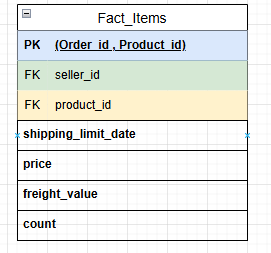

In [24]:
orders.drop('order_item_id',axis=1 , inplace=True)
orders.to_csv("/app/spark/Olist/fact_table/fact_items.csv", index=False)
orders = pd.read_csv("/app/spark/Olist/fact_table/fact_items.csv")
orders.head()

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,count
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1


In [26]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, expr, to_date, avg
import pandas as pd
spark = SparkSession.builder.appName("Preproc").getOrCreate()
orders = spark.read.csv('/app/spark/Olist/raw_data/olist_order_items_dataset.csv',header=True, inferSchema=True)
orders.createOrReplaceTempView("orders_view")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/03/15 07:41:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [31]:
query = """
    SELECT *
    FROM orders_view

"""
spark.sql(query).show()

+--------------------+-------------+--------------------+--------------------+-------------------+------+-------------+
|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date| price|freight_value|
+--------------------+-------------+--------------------+--------------------+-------------------+------+-------------+
|00010242fe8c5a6d1...|            1|4244733e06e7ecb49...|48436dade18ac8b2b...|2017-09-19 09:45:35|  58.9|        13.29|
|00018f77f2f0320c5...|            1|e5f2d52b802189ee6...|dd7ddc04e1b6c2c61...|2017-05-03 11:05:13| 239.9|        19.93|
|000229ec398224ef6...|            1|c777355d18b72b67a...|5b51032eddd242adc...|2018-01-18 14:48:30| 199.0|        17.87|
|00024acbcdf0a6daa...|            1|7634da152a4610f15...|9d7a1d34a50524090...|2018-08-15 10:10:18| 12.99|        12.79|
|00042b26cf59d7ce6...|            1|ac6c3623068f30de0...|df560393f3a51e745...|2017-02-13 13:57:51| 199.9|        18.14|
|00048cc3ae777c65d...|            1|ef92

In [47]:
query = """
    SELECT *,
       RANK() OVER(PARTITION BY order_id, shipping_limit_date, seller_id, product_id 
                   ORDER BY cnt DESC) AS row_rnk
FROM (
    SELECT *, COUNT(order_item_id) OVER(PARTITION BY order_id, shipping_limit_date, seller_id, product_id) AS cnt
    FROM orders_view
    ORDER BY cnt DESC
) subquery
WHERE cnt =1

"""
spark.sql(query).show()

+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+---+-------+
|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date|price|freight_value|cnt|row_rnk|
+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+---+-------+
|00018f77f2f0320c5...|            1|e5f2d52b802189ee6...|dd7ddc04e1b6c2c61...|2017-05-03 11:05:13|239.9|        19.93|  1|      1|
|000229ec398224ef6...|            1|c777355d18b72b67a...|5b51032eddd242adc...|2018-01-18 14:48:30|199.0|        17.87|  1|      1|
|00048cc3ae777c65d...|            1|ef92defde845ab845...|6426d21aca402a131...|2017-05-23 03:55:27| 21.9|        12.69|  1|      1|
|00054e8431b9d7675...|            1|8d4f2bb7e93e6710a...|7040e82f899a04d1b...|2017-12-14 12:10:31| 19.9|        11.85|  1|      1|
|00063b381e2406b52...|            1|f177554ea93259a5b...|8602a61d680a10a82...|2018-

In [ ]:
query = """
    SELECT order_id,product_id,seller_id,shipping_limit_date,price,freight_value,cnt,
       ROW_NUMBER() OVER(PARTITION BY order_id, shipping_limit_date, seller_id, product_id 
                   ORDER BY cnt DESC) AS row_rnk
FROM (
    SELECT *, COUNT(order_item_id) OVER(PARTITION BY order_id, shipping_limit_date, seller_id, product_id) AS cnt
    FROM orders_view
    ORDER BY cnt DESC
) subquery
WHERE cnt =1

"""
spark.sql(query).toPandas().shape

(95337, 9)

In [51]:
q= pd.read_csv("/app/spark/Olist/fact_table/fact_items.csv")
q.shape

(102425, 7)

In [52]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, row_number
from pyspark.sql.window import Window

# Spark 세션 생성
spark = SparkSession.builder.appName("Preproc").getOrCreate()

# 데이터 읽기
orders = spark.read.csv('/app/spark/Olist/raw_data/olist_order_items_dataset.csv', header=True, inferSchema=True)

# 임시 뷰로 등록
orders.createOrReplaceTempView("orders_view")

# 가장 빈번한 order_item_id 찾기
query = """
    SELECT order_id, product_id, seller_id, shipping_limit_date, price, freight_value, order_item_id,
           ROW_NUMBER() OVER (PARTITION BY order_id, shipping_limit_date, seller_id, product_id ORDER BY COUNT(order_item_id) DESC) AS row_rnk
    FROM orders_view
    GROUP BY order_id, product_id, seller_id, shipping_limit_date, price, freight_value, order_item_id
"""
most_frequent_order_item = spark.sql(query)

# 가장 빈번한 order_item_id 값만 선택
most_frequent_order_item = most_frequent_order_item.filter(col("row_rnk") == 1).drop("row_rnk")

# 원래 orders DataFrame과 조인하여 order_item_id 및 price 업데이트
orders = orders.drop("order_item_id", "price").join(most_frequent_order_item, on=["order_id", "shipping_limit_date", "seller_id", "product_id"], how="left")

# 첫번쨰 행만 남기고 중복된 행은 모두 제거
orders = orders.dropDuplicates(subset=["order_id", "shipping_limit_date", "seller_id", "product_id"])

# 결과를 CSV 파일로 저장
orders.toPandas().shape

(102425, 8)